# importing all libraries




*   OS library : It is used for creating and managing seperate directories for Training, Validation and Testing purposes.
*   Tensorflow : API used for creating and tuning Convolutional Neural Networks also ImageDataGenerator is used to create create dataset from directories itself.
*   Copyfile : It is used to copy image over directories
*   Matplotlib.pyplot : A standard library used for graphical represtions and similiar purposes
*   Numpy : Standard Library to ease the working with dataset
*   Img_to_array : To convert a image file into numpy arrays of dimension [ Pixel_hieght, Pixel_width, 3].
*   load_img : To convert numpy arrays to image files.


In [4]:
import os
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Importing Data (On system)


 Download the dataset from [here](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip.).
 replace the image_dir with path of PetImages.

In [ ]:
image_dir = 'kagglecatsanddogs_5340\PetImages'    ### Path of PetImages(the folder contains all the dataset.)

root_dir = 'cats-v-dogs'
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

# Importing Data (Online)

In [5]:
import zipfile
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

image_dir = '/tmp/PetImages'
root_dir = '/tmp/cats-v-dogs'
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

--2023-12-09 03:57:29--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.194.9, 2600:1407:e800:d93::317f, 2600:1407:e800:d8c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.46.194.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   108MB/s    in 9.6s    

2023-12-09 03:57:39 (82.1 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



# Defining Split

This split_data(..) function takes parameter :  

*   SOURCE_DIR (directory of PetImages)
*   TRAINING_DIR (directory of Training data)
*   VALIDATION_DIR (Directory of validation)
*   SPLIT_SIZE (the ratio in which we want to split train and validation data)
*   TEST_NUM ( Number of images we need to keep in testing data)
*   TESR_DIR (The directory of testing data)

We ignore files of zero length and splits the source dataset into train, validation and test.


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE, TEST_NUM, TEST_DIR):
  all_files = []
  for file_name in os.listdir(SOURCE_DIR):
    filepath = SOURCE_DIR + file_name
    if os.path.getsize(filepath):
      all_files.append(file_name)
    else:
      print('{} is zero length , ignoring...'.format(file_name))

  test_set = all_files[:TEST_NUM]
  for file_name in test_set:
    copyfile(SOURCE_DIR + file_name, TEST_DIR+ file_name)
  all_files = all_files[TEST_NUM:]
  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
  shuffled  = random.sample(all_files, n_files)
  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]
  for file_name in train_set:
    copyfile(SOURCE_DIR + file_name, TRAINING_DIR + file_name)
  for file_name in test_set:
    copyfile(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)

# Mangaing Directories

Here if you are working on your systems please replace the paths respectively.

In [6]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"              ### Source path for cats
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"              ### Source path for dogs

TRAINING_DIR = "/tmp/cats-v-dogs/training/"         ### training path
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"     ### validation path
TESTING_DIR = "/tmp/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

Creating the paths.

In [ ]:
os.makedirs(TRAINING_CATS_DIR)
os.makedirs(VALIDATION_CATS_DIR)
os.makedirs(TRAINING_DOGS_DIR)
os.makedirs(VALIDATION_DOGS_DIR)
os.makedirs(TESTING_CATS_DIR)
os.makedirs(TESTING_DOGS_DIR)
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Splitting our data

Defining size of test and validation split

In [ ]:
TEST_SIZE = 200
split_size = .9

In [ ]:
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size,TEST_SIZE, TESTING_CATS_DIR)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size,TEST_SIZE, TESTING_DOGS_DIR)


666.jpg is zero length , ignoring...
11702.jpg is zero length , ignoring...


In [ ]:
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")



Original cat's directory has 12300 images
Original dog's directory has 12300 images

There are 10889 images of cats for training
There are 10889 images of dogs for training
There are 1210 images of cats for validation
There are 1210 images of dogs for validation
There are 200 images of cats for testing
There are 200 images of dogs for testing


# Image Augmentations


Here we augment our image to create more dataset from our sourcce data this increses our dataset and also prevents Neural Network from overfitting.

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,     ### Performing image augmentation to generate differnt images from one image
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip= True,
                                     fill_mode='nearest')
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
  validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22136 images belonging to 2 classes.
Found 2460 images belonging to 2 classes.


# Defining Callbacks

This stops our training when we reach at certain level of accuracy and saves unnecessary computations and time

In [ ]:
loss = 0.5
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < loss):
      print("\nLoss is lower than 0.5 so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

# Defining Model

Here we are using 4 convolution layers with different filter (16, 32, 64 and 128 respectively).

In [ ]:

def create_model(Dense_count):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(Dense_count, activation='relu'),    ### Dense layer
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model


# Creating Model

We can tweak the count of neurons in Dense layer using Dense_count (Default is 512)

In [ ]:
Dense_count = 512
model = create_model(Dense_count)

# Training

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks= callbacks)

Epoch 1/15
 852/1107 [======================>.......] - ETA: 54s - loss: 0.6791 - accuracy: 0.5653

c:\Users\divyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1107/1107 [==============================] - 242s 218ms/step - loss: 0.6716 - accuracy: 0.5806 - val_loss: 0.6586 - val_accuracy: 0.6102
Epoch 2/15
1107/1107 [==============================] - 240s 217ms/step - loss: 0.6062 - accuracy: 0.6710 - val_loss: 0.5107 - val_accuracy: 0.7569
Epoch 3/15
1107/1107 [==============================] - 245s 222ms/step - loss: 0.5638 - accuracy: 0.7157 - val_loss: 0.4613 - val_accuracy: 0.7837
Epoch 4/15
1107/1107 [==============================] - 246s 222ms/step - loss: 0.5336 - accuracy: 0.7379 - val_loss: 0.5124 - val_accuracy: 0.7724
Epoch 5/15
1107/1107 [==============================] - 248s 224ms/step - loss: 0.5038 - accuracy: 0.7589 - val_loss: 0.3752 - val_accuracy: 0.8321
Epoch 6/15
1107/1107 [==============================] - 232s 210ms/step - loss: 0.4777 - accuracy: 0.7767 - val_loss: 0.3733 - val_accuracy: 0.8142
Epoch 7/15
1107/1107 [==============================] - 284s 256ms/step - loss: 0.4495 - accuracy: 0.7921 - val_loss: 0.312

# Results

Our Training and Validation accuracy is shown here.

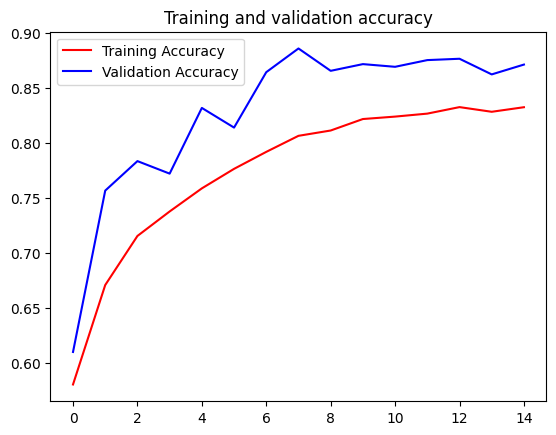

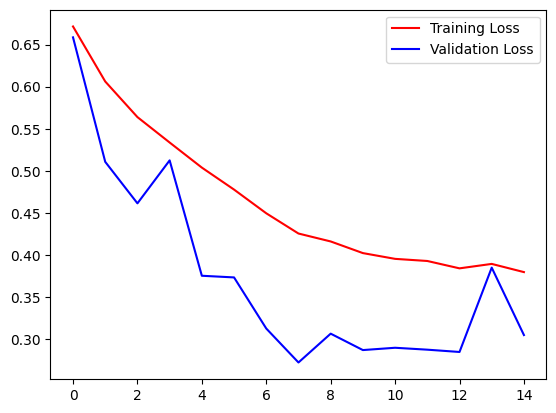

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label ="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")


Our Train and Validation loss is shown here.

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.show()


# Visualising Convloutions

Here we see intermediate output of convolution layer and see what features are more prominent i.e the stand out in dogs or cats.

1/1 [==============================] - 0s 100ms/step


C:\Users\divyr\AppData\Local\Temp\ipykernel_33624\1689078313.py:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\divyr\AppData\Local\Temp\ipykernel_33624\1689078313.py:51: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


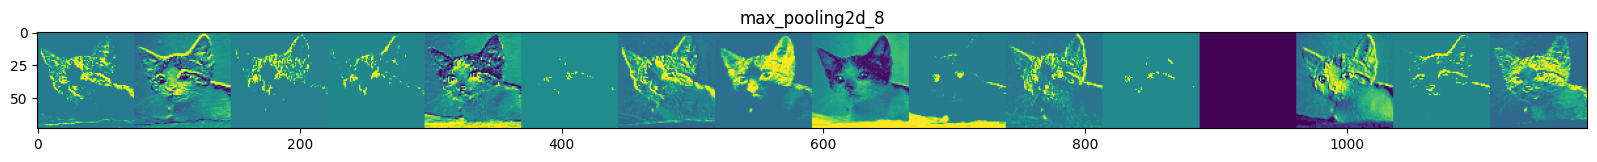

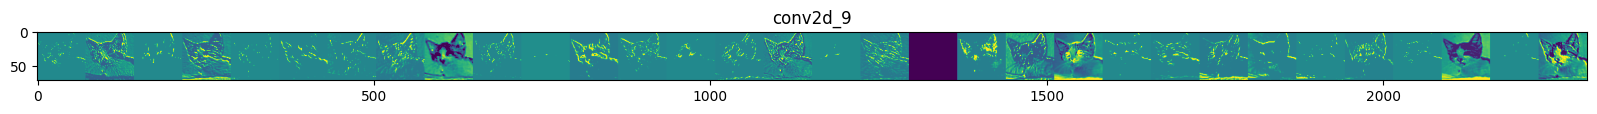

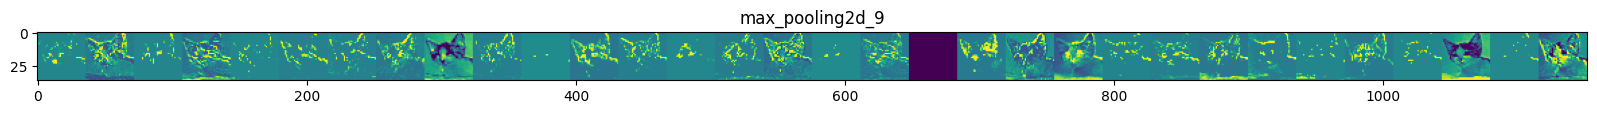

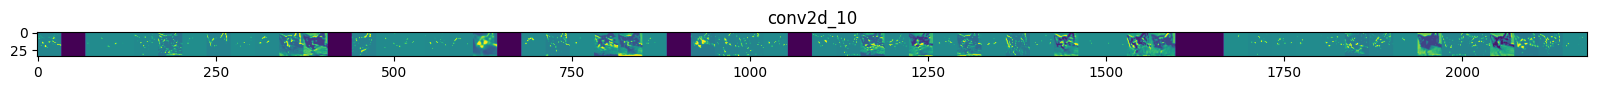

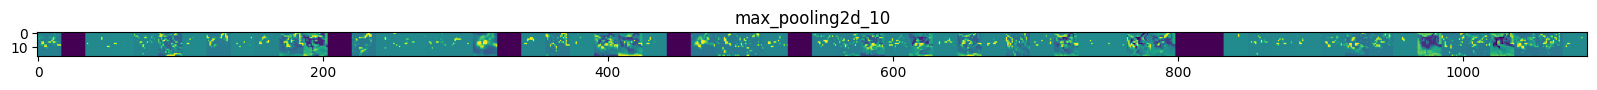

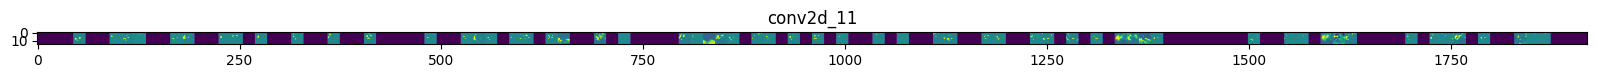

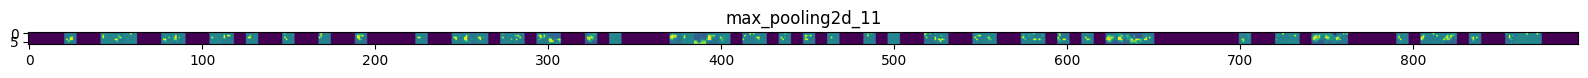

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


train_cats_names = os.listdir(TRAINING_CATS_DIR)             # Preparing a random cat image from the training set.
train_dogs_names = os.listdir(TRAINING_DOGS_DIR)             # Preparing a random dog image from the training set.
cat_img_files = [os.path.join(TRAINING_CATS_DIR, f) for f in train_cats_names]
dog_img_files = [os.path.join(TRAINING_DOGS_DIR, f) for f in train_dogs_names]
img_path = random.choice(cat_img_files + dog_img_files)      # Selecting either a cat or a dog
img = load_img(img_path, target_size=(150, 150))             # this is a PIL image
x = img_to_array(img)                                        # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)                                # Numpy array with shape (1, 150, 150, 3)
x /= 255                                                     # Scale by 1/255

successive_feature_maps = visualization_model.predict(x)     # Getting visualisations
layer_names = [layer.name for layer in model.layers[1:]]     # Naming layers

#Displaying Visualisaton.

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Testing our model

In [7]:
cats = 0
dogs = 0
for image in os.listdir(TESTING_CATS_DIR):
  img = load_img(TESTING_CATS_DIR + image, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    cats = cats+1
for image in os.listdir(TESTING_DOGS_DIR):
  print()
  img = load_img(TESTING_DOGS_DIR+image, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    dogs = dogs+1


NameError: ignored

In [ ]:
resutls_cats = cats/TEST_SIZE
resutls_dogs = dogs/TEST_SIZE
print('Our model is ',resutls_cats * 100, '%',' accurate in predicting cats')
print('Our model is ',resutls_dogs * 100, '%',' accurate in predicting dogs')

model is  83.08457711442786 %  accurate in predicting cats
model is  95.52238805970148 %  accurate in predicting dogs


# Predicting on User Input

In [8]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Dog")
  else:
    print(fn + " is a Cat")
